# About Dataset

## Project Overview:
This dataset is a record of every building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

The Dataset Contains:
The location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:
* BORORUGH : A digit code for the borough the property is located in; in order these are Manhattan(1), Bronx(2), Brooklyn(3), Queens(4), and Staten Island(5).
* BLOCK; LOT : The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE : The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

* Many sales occur with a nonsensically small dollar amount : $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
* This dataset uses the financial definition of a building/building unit, for tax puposes. In case a single entity owns the building ini question, a sale covers the value of the entire buildding. In case a building is owned piecemeal by its residents (a condominium), a sale refers to single apartement (or group of apartement) owned by some individual.

---

# Import Libraries

In [1]:
# library untuk DataFrame
import numpy as np 
import pandas as pd

# library untuk analisis
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import scipy.stats
from datetime import datetime
from scipy.stats import t
from scipy.stats import ttest_ind

# me-non aktifkan peringatan pada python
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
# membaca dataset
df = pd.read_csv('nyc-rolling-sales.csv')

# menampilkan semua kolom
pd.set_option('display.max_columns', 22)

print('NYC Property Sales')
df

NYC Property Sales


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [3]:
# menampilkan 5 data teratas
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
# menampilkan 5 data terbawah
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,,10309,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [5]:
# informasi tentang tipe data untuk masing-masing atribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [6]:
# menampilkan ukuran data (jumlah baris, jumlah kolom)
df.shape

(84548, 22)

diketahui bahwa terdapat 84.548 baris dan 22 kolom

## Data Cleaning dan Data Preprocessing

#### Drop Unnecessary Columns

In [7]:
# drop kolom yang tidak diperlukan
df.drop(['Unnamed: 0', 'BLOCK', 'LOT', 'EASE-MENT', 'APARTMENT NUMBER', 'ADDRESS', 'ZIP CODE'], axis=1, inplace=True)
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,C7,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,C7,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


#### Change Data Type

In [8]:
# mengubah tipe beberapa kolom menjadi kategori

categorical = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 
               'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE']

for col in categorical:
    df[col] = df[col].astype('category')

In [9]:
# mengubah tipe beberapa kolom menjadi numerik

numerical = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']

for col in numerical:
    df[col] = pd.to_numeric(df[col], errors = "coerce")

In [10]:
# mengubah sale date dengan format datetime
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors = 'coerce')

#### Missing Values

In [11]:
miss_val = round((df.isnull().sum())/len(df)*100, 2)
miss_val = pd.DataFrame(miss_val)
miss_val = miss_val.rename(columns = {0 : 'missing values percentage'})
miss_val

,missing values percentage
BOROUGH,0.00
NEIGHBORHOOD,0.00
BUILDING CLASS CATEGORY,0.00
TAX CLASS AT PRESENT,0.00
BUILDING CLASS AT PRESENT,0.00
RESIDENTIAL UNITS,0.00
COMMERCIAL UNITS,0.00
TOTAL UNITS,0.00
LAND SQUARE FEET,31.05
GROSS SQUARE FEET,32.66


Berdasarkan hasil diatas, LAND SQUARE FEET memiliki persentase missing values sebanyak 31%, GROSS SQUARE FEET memiliki persentase missing values sebanyak 33%, dan SALE PRICE memiliki persentase missing values sebanyak 17%. Karena dataset ini merupakan _financial dataset_ yang mana tidak ada data pada kolom SALE PRICE apabila harga properti yang terjual senilai $0, sehingga terdapat probabilitas bahwa properti tersebut mengalami _transferring ownership_. Selain itu, kolom LAND SQUARE FEET dan GROSS SQUARE FEET yang mengandung missing value dianggap data yang tidak valid. Sehingga, semua missing value akan didrop atau dihilangkan dari dataset tersebut.



In [12]:
# drop missing values
df = df.dropna()

In [13]:
# memeriksa kembalu missing value
df.isnull().any()

BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT              False
BUILDING CLASS AT PRESENT         False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                  False
GROSS SQUARE FEET                 False
YEAR BUILT                        False
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE DATE                         False
dtype: bool

sudah tidak terdapat lagi missing value pada dataset, maka selanjunya dilakukan pemeriksaan data yang terduplikat

#### Duplicated Data

In [14]:
# mengecek apakah ada data yang terduplikat
df.duplicated().sum()

959

terdapat 959 baris data terduplikat, sehingga data tersebut harus dihilangkan

In [15]:
# drop data duplikat
df.drop_duplicates(inplace=True)

# memeriksa kembali data duplikat
df.duplicated().sum()

0

#### Outliers

##### Kolom `SALE PRICE`

In [16]:
# melihat kolom SALE PRICE
df['SALE PRICE'].describe()

count    4.728500e+04
mean     1.171341e+06
std      1.352859e+07
min      0.000000e+00
25%      1.247340e+05
50%      4.900000e+05
75%      8.400000e+05
max      2.210000e+09
Name: SALE PRICE, dtype: float64

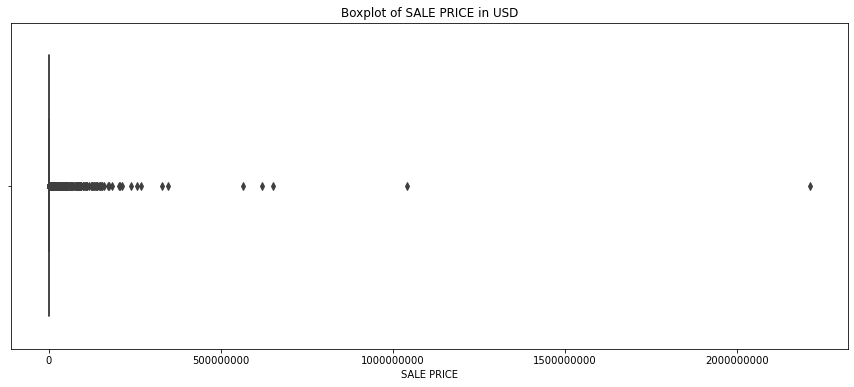

In [17]:
# sebaran data pada kolom SALE PRICE menggunakan boxplot
plt.figure(figsize = (15, 6))

sns.boxplot(data = df, x = 'SALE PRICE')
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

Terlihat bahwa nilai maximum pada kolom `SALE PRICE` adalah 2.210.000.000, sedangkan nilai pada kuartil kedua (Q2) adalah sebesar 4.900.000 dan kuartil ketiga (Q3) adalah sebesar 8.400.000. Maka dari itu untuk memperjalas sebaran data, akan dilihat distribusi `SALE PRICE` dibawah 5.000.000 karena selain nilai maksimum, nilai Q3 juga dianggap sebagai outlier.

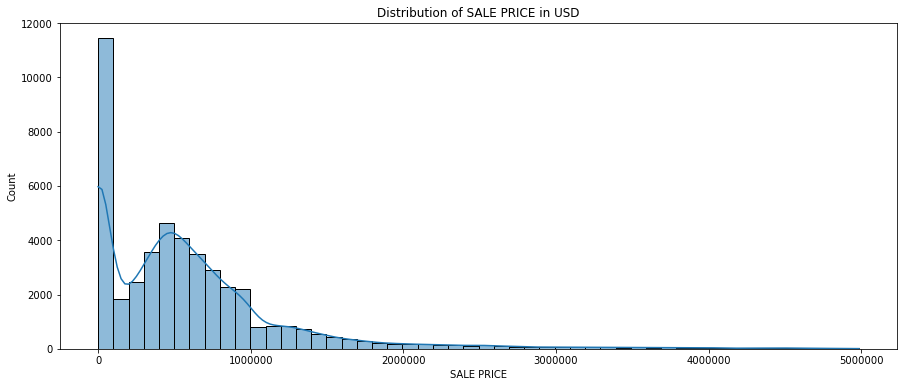

In [18]:
# sebaran data kolom SALE PRICE dibawah 5.000.000
df = df[(df['SALE PRICE'] < 5000000)]

plt.figure(figsize = (15, 6))
sns.histplot(data = df, x = 'SALE PRICE', kde = True, bins = 50)
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.title('Distribution of SALE PRICE in USD')
plt.show()

Nilai minimum pada kolom `SALE PRICE` adalah 0 sedangkan nilai pada kuartil pertama (Q1) adalah sebesar 124.734. Dari sebaran data di atas, terlihat data yang berbeda signifikan berada pada kisaran rentang 0 hingga 100.000 dimana nilai minimum dianggap sebagai outlier, maka apabila data pada rentang tersebut tidak ditampilkan distribusi kolom `SALE PRICE` adalah sebagai berikut: 

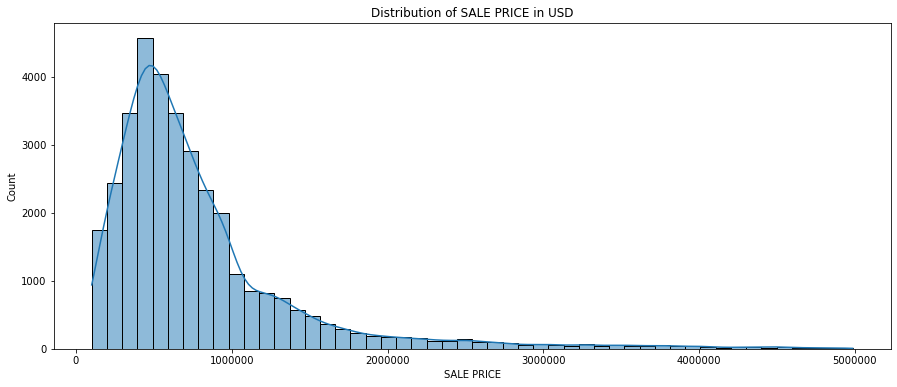

In [19]:
# sebaran data kolom SALE PRICE dengan rentang antara 100.000 hingga 5.000.000
df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 5000000)]

plt.figure(figsize = (15, 6))
sns.histplot(data = df, x = 'SALE PRICE', kde = True, bins = 50)
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.title('Distribution of SALE PRICE in USD')
plt.show()

In [20]:
# menampilkan deskripsi kolom SALE PRICE setelah menghilangkan outlier
df['SALE PRICE'].describe()

count    3.458700e+04
mean     7.965060e+05
std      6.536591e+05
min      1.007000e+05
25%      4.160950e+05
50%      6.160000e+05
75%      9.300000e+05
max      4.986410e+06
Name: SALE PRICE, dtype: float64

Dalam analisis kali ini, nilai minimum dan Q3 pada data awal dianggap sebagai data outlier. Setelah menghilangkan outlier pada kolom `SALE PRICE`, terlihat perubahan nilai minimum yang awalnya 0 menjadi 100.700 dan nilai maksimum yang awalnya 2.210.000.000 menjadi 4.986.410.

##### Kolom `TOTAL UNITS`

In [21]:
# menampilkan isi kolom total units
df['TOTAL UNITS'].unique()

array([  10,    8,    4,    6,    1,    9,    7,   32,   24,   30,    2,
          5,    3,   12,   15,   23,   16,   35,   11,    0,   51,   38,
         18,   26,   21,   20,   17,   36,   14,  102,  121,  192,  193,
         29,   13,   27,   31,   25,   47,   28,   22,   63,   78,   58,
        462,   64,   39,   48,   19,   86,  286,   72,   34,  324,   84,
        100,   68,  152,  136,  295,  120, 1866,   56,  150,   96, 2261,
        446,  143,   60,  126], dtype=int64)

In [22]:
# melihat data gabungan total units dan sale price
df[['TOTAL UNITS', 'SALE PRICE']].groupby(['TOTAL UNITS']).count().sort_values(by = 'SALE PRICE', ascending = False)

,SALE PRICE
TOTAL UNITS,
1,16804
2,9517
0,3742
3,2730
4,704
...,...
51,1
34,1
47,1


Berdasarkan tabel di atas, akan dihilangkan data bernilai 0, 1866, dan 2261 yang dianggap sebagai outlier pada kolom `TOTAL UNITS`

In [23]:
# menghilangkan outlier kolom total units
df = df[(df['TOTAL UNITS'] > 0) & (df['TOTAL UNITS'] != 1866) & (df['TOTAL UNITS'] != 2261)]

##### Kolom `LAND SQUARE FEET`

In [24]:
df['LAND SQUARE FEET'].describe()

count    3.084300e+04
mean     2.983927e+03
std      1.773301e+04
min      0.000000e+00
25%      1.800000e+03
50%      2.388000e+03
75%      3.420000e+03
max      1.865243e+06
Name: LAND SQUARE FEET, dtype: float64

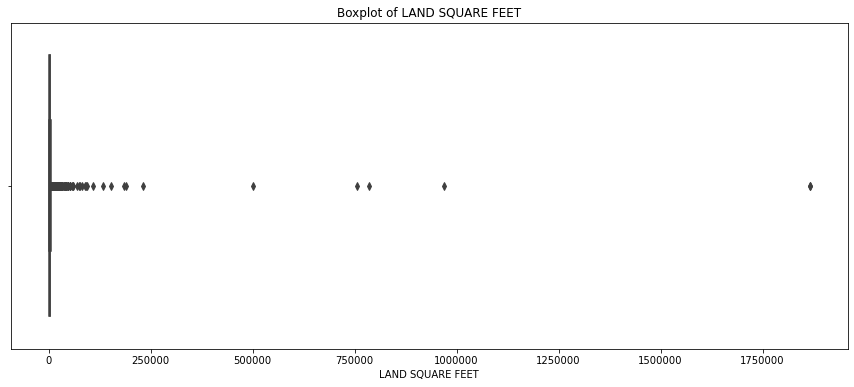

In [25]:
plt.figure(figsize = (15, 6))

sns.boxplot(data = df, x = 'LAND SQUARE FEET')
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.title('Boxplot of LAND SQUARE FEET')
plt.show()

Berdasarkan deskripsi data, terdapat data bernilai 0 pada kolom `LAND SQUARE FEET` dan memiliki nilai maksimum sebesar 1.865.243, sedangkan kuartil ketiga (Q3) kolom `LAND SQUARE FEET` sebesar 3.420, maka data yang lebih dari 4.000 pada kolom `LAND SQUARE FEET` dianggap sebagai outlier. Kemudian, data yang bernilai 0 tidak akan dimasukkan dalam analisis.

In [26]:
# sebaran data kolom LAND SQUARE FEET dibawah 4.000 dan data tidak nol
df = df[(df['LAND SQUARE FEET'] < 4000) & (df['LAND SQUARE FEET'] != 0)]

<AxesSubplot:xlabel='LAND SQUARE FEET', ylabel='Count'>

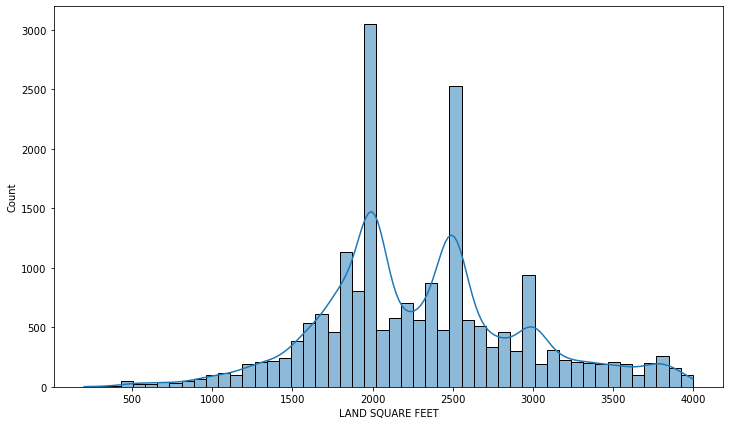

In [27]:
# visualisasi data kolom LAND SQUARE FEET
plt.figure(figsize = (12, 7))
sns.histplot(data = df, x = 'LAND SQUARE FEET', kde = True, bins = 50)

##### Kolom `GROSS SQUARE FEET`

In [28]:
df['GROSS SQUARE FEET'].describe()

count    20299.000000
mean      2083.204444
std       1199.196318
min          0.000000
25%       1344.000000
50%       1785.000000
75%       2460.000000
max      20500.000000
Name: GROSS SQUARE FEET, dtype: float64

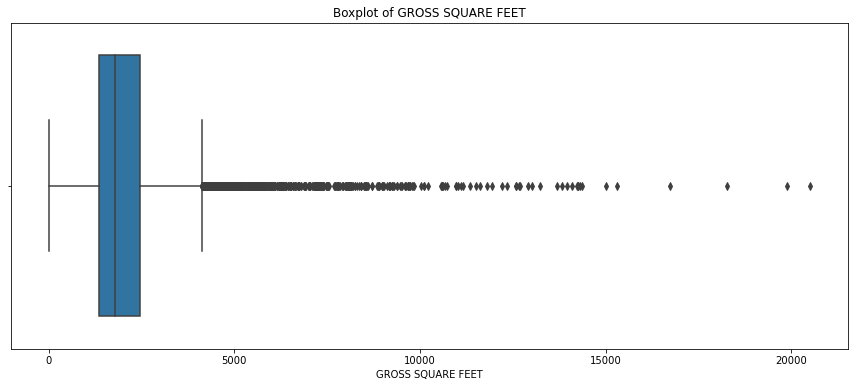

In [29]:
plt.figure(figsize = (15, 6))

sns.boxplot(data = df, x = 'GROSS SQUARE FEET')
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.title('Boxplot of GROSS SQUARE FEET')
plt.show()

Berdasarkan deskripsi data, terdapat data bernilai 0 pada kolom `GROSS SQUARE FEET` dan memiliki nilai maksimum sebesar 20.500, sedangkan kuartil ketiga (Q3) kolom `GROSS SQUARE FEET` sebesar 2.460, maka data yang lebih dari 3.000 pada kolom `GROSS SQUARE FEET` dianggap sebagai outlier. Kemudian, data yang bernilai 0 tidak akan dimasukkan dalam analisis.

In [30]:
# sebaran data kolom LAND SQUARE FEET dibawah 3.000 dan data tidak nol
df = df[(df['GROSS SQUARE FEET'] < 3000) & (df['GROSS SQUARE FEET'] != 0)]

<AxesSubplot:xlabel='GROSS SQUARE FEET', ylabel='Count'>

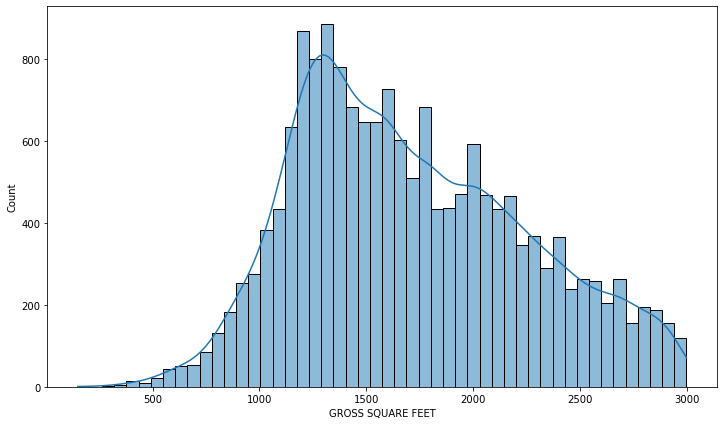

In [31]:
# visualisasi data kolom LAND SQUARE FEET
plt.figure(figsize = (12, 7))
sns.histplot(data = df, x = 'GROSS SQUARE FEET', kde = True, bins = 50)

Setelah mengatasi outlier, selanjutnya akan dilakukan mapping

#### Mapping

Karena kolom BOROUGH pada dataset masih berupa data kategori angka, maka akan diubah berdasarkan nama borough pada angka tersebut

In [32]:
# mengganti kode area 1 dengan manhattan, 2 dengan bronx, 3 dengan brooklyn, 4 dengan queens, dan 5 dengan staten island
df['BOROUGH'] = df['BOROUGH'].map({1:'Manhattan', 
                                   2:'Bronx', 
                                   3:'Brooklyn', 
                                   4:'Queens',
                                   5:'Staten Island'})

In [33]:
# mengubah index
df.reset_index(drop = True, inplace = True)

### Final Data

In [34]:
# menampilkan final data setelah data cleaning dan data preprocessing
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,CHINATOWN,22 STORE BUILDINGS,4,K4,1,3,4,892.0,1784.0,1920,4,K4,3000000.0,2017-07-31
1,Manhattan,CHINATOWN,22 STORE BUILDINGS,4,K4,0,2,2,1098.0,2712.0,1915,4,K4,2700000.0,2017-01-05
2,Manhattan,CLINTON,41 TAX CLASS 4 - OTHER,4,Z9,0,2,2,2510.0,336.0,1998,4,Z9,4700000.0,2017-02-01
3,Manhattan,EAST VILLAGE,02 TWO FAMILY DWELLINGS,1,B9,2,0,2,1275.0,2640.0,1899,1,B9,4000000.0,2017-06-08
4,Manhattan,GREENWICH VILLAGE-WEST,01 ONE FAMILY DWELLINGS,1,A5,1,0,1,384.0,1152.0,1901,1,A5,1375000.0,2016-10-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17119,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,B9,2,0,2,3801.0,2704.0,1996,1,B9,610000.0,2016-12-05
17120,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,B2,2,0,2,3800.0,2700.0,1996,1,B2,168000.0,2017-01-19
17121,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,B2,2,0,2,3325.0,1300.0,1995,1,B2,509000.0,2016-10-31
17122,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,B9,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28


In [35]:
# menampilkan final data describe setelah data cleaning dan data preprocessing
df.describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,17124.000000,17124.000000,17124.000000,17124.000000,17124.000000,1.712400e+04
mean,1.581640,0.043097,1.623569,2303.453399,1710.510512,6.596901e+05
std,0.767593,0.259177,0.774058,648.035645,538.455817,4.364258e+05
min,0.000000,0.000000,1.000000,200.000000,150.000000,1.007000e+05
25%,1.000000,0.000000,1.000000,1900.000000,1292.000000,4.050000e+05
50%,1.000000,0.000000,2.000000,2242.000000,1624.000000,5.500000e+05
75%,2.000000,0.000000,2.000000,2642.250000,2090.000000,7.800000e+05
max,12.000000,14.000000,14.000000,3998.000000,2999.000000,4.900000e+06


## Measure of Central Tendency : Mean

#### Berapa rata-rata harga penjualan properti di setiap wilayah?

In [36]:
# mengetahui rata-rata harga properti di masing-masing wilayah
mean_of_spborough = df.groupby(['BOROUGH'])[['SALE PRICE']].mean()
mean_of_spborough

,SALE PRICE
BOROUGH,
Manhattan,2.044357e+06
Bronx,4.460411e+05
Brooklyn,8.833914e+05
Queens,6.218479e+05
Staten Island,4.402367e+05


Keterangan:
1. Area Manhattan memiliki rata rata sale price sebesar 2.044.357
2. Area Bronx memiliki rata rata sale price sebesar 446.041
3. Area Brooklyn memiliki memiliki rata rata sale price sebesar 883.391
4. Area Queens memiliki rata rata sale price sebesar 621.847
5. Area Staten Islands memiliki rata rata sale price sebesar 440.236

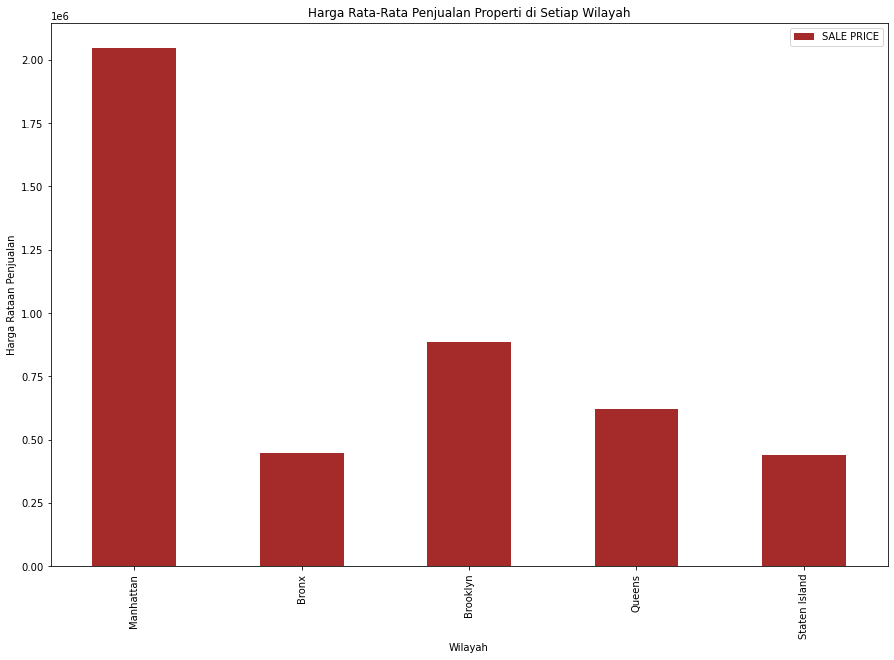

In [37]:
# menampilkan visualisasi data rata-rata harga properti di masing-masing wilayah
mean_of_spborough.plot(kind = 'bar', figsize = (15, 10), color = 'brown')

plt.title('Harga Rata-Rata Penjualan Properti di Setiap Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Harga Rataan Penjualan')
plt.show()

## Measure of Central Tendency : Median

#### Berapa median/nilai tengah harga penjualan properti berdasarkan 7 building class category tertinggi?

In [38]:
# mengetahui nilai tengah harga penjualan berdasarkan 7 building class category tertinggi
med_spb = df.groupby(['BUILDING CLASS CATEGORY'])[['SALE PRICE']].median().sort_values(by = 'SALE PRICE', ascending = False)
med_spb7 = med_spb.head(7)
med_spb7

,SALE PRICE
BUILDING CLASS CATEGORY,
38 ASYLUMS AND HOMES,3400000.0
07 RENTALS - WALKUP APARTMENTS,1169591.0
30 WAREHOUSES,1100000.0
32 HOSPITAL AND HEALTH FACILITIES,975000.0
14 RENTALS - 4-10 UNIT,950000.0
06 TAX CLASS 1 - OTHER,892500.0
03 THREE FAMILY DWELLINGS,790000.0


Keterangan:

1. Kategori RENTALS - ELEVATOR APARTMENTS memiliki nilai tengah sale price sebesar 3.400.000
2. Kategori HOSPITAL AND HEALTH FACILITIES memiliki nilai tengah sale price sebesar 1.169.591
3. Kategori ASYLUMS AND HOMES memiliki nilai tengah sale price sebesar 1.100.000
4. Kategori FACTORIES memiliki nilai tengah sale price sebesar 975.000
5. Kategori WAREHOUSES memiliki nilai tengah sale price sebesar 950.000
6. Kategori LOFT BUILDINGS memiliki nilai tengah sale price sebesar 892.500
7. Kategori RENTALS - 4-10 UNIT memiliki nilai tengah sale price sebesar 790.000

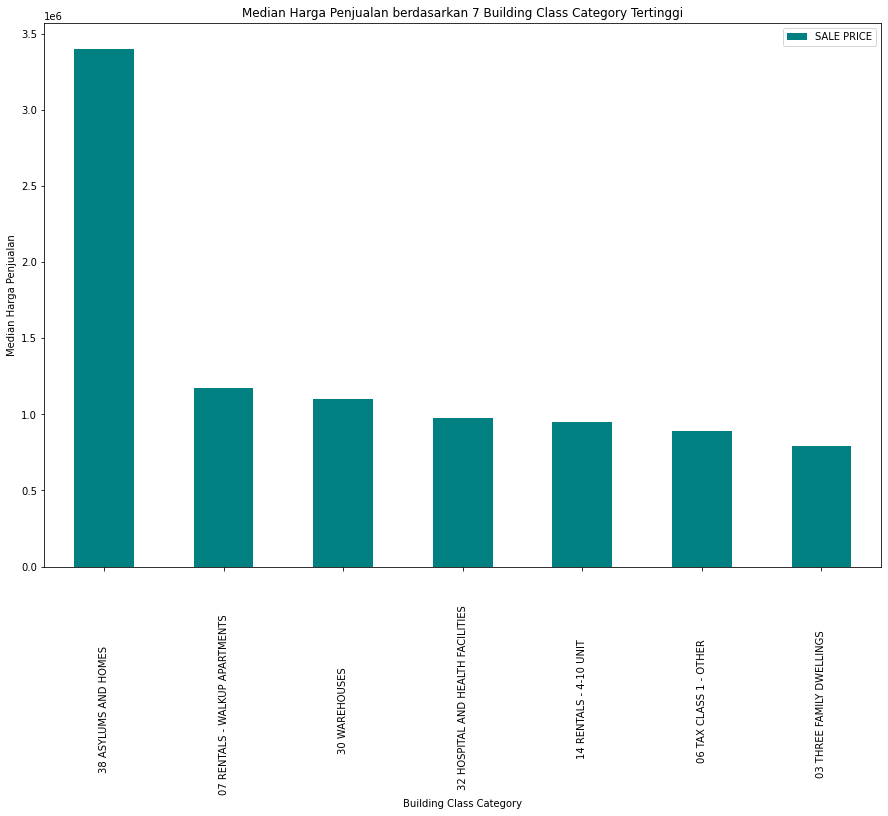

In [39]:
# menampilkan visualisasi nilai tengah harga penjualan berdasarkan 7 building class category tertinggi
med_spb7.plot(kind = 'bar', figsize = (15, 10), color = 'teal')

plt.title('Median Harga Penjualan berdasarkan 7 Building Class Category Tertinggi')
plt.xlabel('Building Class Category')
plt.ylabel('Median Harga Penjualan')
plt.show()

## Measure of Central Tendency : Modus

#### Wilayah dan daerah apa yang paling banyak terjual?

In [40]:
# mengetahui modus wilayah dan daerah 
print("Mode Borough       :" , df['BOROUGH'].mode()[0])
print("Mode Neighborhood  :" , df['NEIGHBORHOOD'].mode()[0])

Mode Borough       : Queens
Mode Neighborhood  : EAST NEW YORK


Keterangan:

Queens merupakan wilayah dengan penjualan properti terbanyak dan EAST NEW YORK merupakan daerah yang memiliki properti terbanyak yang dijual di NYC

#### Kategori kelas bangunan apakah yang paling sering terjual di wilayah Queens?

In [41]:
# mengetahui kategori kelas bangunan yang paling banyak terjual di Queens
bor_que = df['BOROUGH'] == 'Queens'
statistics.mode(df[bor_que]['BUILDING CLASS CATEGORY'])

'01 ONE FAMILY DWELLINGS                    '

Keterangan:

Kategori kelas bangunan yang paling banyak terjual di wilayah Queens adalah 01 ONE FAMILY DWELLINGS

## Measure of Spread : Range

#### Berapa range luas Land Square Feet dan Gross Square Feet?

In [42]:
# mengetahui range land square feet dan gross square feet
print('Range Land Square Feet: ', np.ptp(df['LAND SQUARE FEET']))
print('Range Gross Square Feet: ', np.ptp(df['GROSS SQUARE FEET']))

Range Land Square Feet:  3798.0
Range Gross Square Feet:  2849.0


## Measure of Spread : Variance

#### Berapa variansi luas Land Square Feet dan Gross Square Feet?

In [43]:
# mengetahui variansi land square feet dan gross square feet
print('Variansi Land Square Feet: ', statistics.variance(df['LAND SQUARE FEET']))
print('Variansi Gross Square Feet: ', statistics.variance(df['GROSS SQUARE FEET']))

Variansi Land Square Feet:  419950.1966835364
Variansi Gross Square Feet:  289934.6666535022


## Measure of Spread : Standard Deviation

#### Berapa standar deviasi luas Land Square Feet dan Gross Square Feet?

In [44]:
# mengetahui stdev land square feet dan gross square feet
print('Standar Deviasi Land Square Feet: ', statistics.stdev(df['LAND SQUARE FEET']))
print('Standar Deviasi Gross Square Feet: ', statistics.stdev(df['GROSS SQUARE FEET']))

Standar Deviasi Land Square Feet:  648.035644608795
Standar Deviasi Gross Square Feet:  538.4558168071937


## Probability Distribution

#### Bagaimana distribusi peluang dari SALE PRICE?

<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

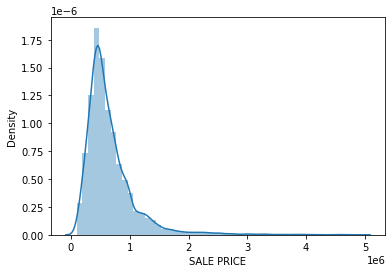

In [45]:
# distribusi dataset awal kolom SALE PRICE
sns.distplot(df['SALE PRICE'], kde = True, bins = 50)

In [46]:
# deskripsi data sale price sebelum normalisasi
df['SALE PRICE'].describe()

count    1.712400e+04
mean     6.596901e+05
std      4.364258e+05
min      1.007000e+05
25%      4.050000e+05
50%      5.500000e+05
75%      7.800000e+05
max      4.900000e+06
Name: SALE PRICE, dtype: float64

Dari dataset awal, setelah melakukan penghapusan outlier pada kolom SALE PRICE yang mana dalam analisis kali ini hanya menggunakan nilai dalam rentang 100.000 hingga 5.000.000 pada kolom tersebut. Selanjutnya, akan dilakukan normalisasi data dengan tujuan mengatasi/menghindari redundansi data. Pada analisis kali ini, normalisasi dilakukan dengan mengubah data berdistribusi log-normal. Kemudian, akan dilihat distribusi peluang dari kolom SALE PRICE.

0.20765021138599168


<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

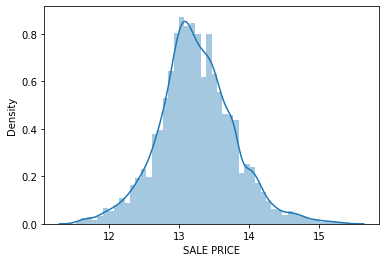

In [47]:
# normalisasi sale price
df_saleprice = np.log(df['SALE PRICE'])
print(df_saleprice.skew())
sns.distplot(df_saleprice)

In [48]:
# deskripsi data setelah normalisasi
df_saleprice.describe()

count    17124.000000
mean        13.242955
std          0.544693
min         11.519901
25%         12.911642
50%         13.217674
75%         13.567049
max         15.404746
Name: SALE PRICE, dtype: float64

Kesimpulan :

Setelah dilakukan normalisasi data dengan menggunakan transformasi log, distribusi data SALE PRICE mrnjadi normal secara visual maupun secara statistik. Sehingga, kolom SALE PRICE menjadi berdistribusi normal.

## Confidence Intervals

#### Berapa interval kepercayaan terhadap rataan harga penjualan properti di NYC?

In [49]:
# definisikan x sebagai kolom SALE PRICE
df_sp = df['SALE PRICE'] 

# menghitung nilai mean, stdev, dan ukuran sampel dari kolom SALE PRICE
mean = df_sp.mean()
std = df_sp.std()
n = df_sp.count()

# degree of freedom atau derajat bebas untuk menentukan nilai statistik uji
dof = len(df_sp) - 1 

# menggunakan peluang kepercayaan sebesar 95%
confidence = 0.95

# menghitung nilai z-score atau nilai statistik uji
z_score = np.abs(t.ppf((1 - confidence) / 2, dof))

# menghitung nilai standard error
s_e = std / np.sqrt(n)

# lower and upper limit of confidence intervals
lower = mean - z_score * s_e
upper = mean + z_score * s_e

print("[", lower, ",", upper, "]")
#print('Interval kepercayaan:' lower, 'hingga', upper)

[ 653152.980243653 , 666227.2242646395 ]


Berdasarkan hasil di atas, diketahui bahwa rataan harga penjualan properti (SALE PRICE) di wilayah NYC berada di antara rentang 653.152 USD hingga 666.227 USD dengan peluang kepercayaan 0.95 atau 95%.

## Hypothesis Testing

#### Apakah wilayah Bronx  memiliki rata-rata harga penjualan yang lebih tinggi dibandingkan wilayah di Staten Island?

Berdasarkan analisis statistik deskriptif yang dilakukan sebelumnya, diperoleh bahwa properti di wilayah Bronx memiliki harga penjualan yang lebih tinggi dibandingkan wilayah di wilayah Staten Island. Sehingga, akan diuji apakah data tersebut menyajikan bukti yang cukup untuk menunjukkan bahwa rata-rata harga penjualan Bronx lebih tinggi dibandingkan Sataten Island menggunakan Student's t-test?

Parameter:
* μ1 = harga penjualan di wilayah Bronx
* μ2 = harga penjualan di wilayah Staten Island

Tingkat signifikansi:
* α = 5% = 0,05

Hipotesis: 
* H0 : μ1 = μ2 (harga penjualan di wilayah Bronx memiliki rata-rata yang sama dengan harga penjualan di wilayah Staten Island)
* H1 : μ1 > μ2 (harga penjualan di wilayah Bronx memiliki rata-rata yang lebih tinggi daripada harga penjualan di wilayah Staten Island)
> menggunakan hipotesis dengan
one tailed test


Syarat penolakan H0 :
* H0 ditolak jika nilai p-value < alpha = 0.05

In [50]:
# memilih data yang akan dianalisis
bx = df[df['BOROUGH'] == 'Bronx']['SALE PRICE']
si = df[df['BOROUGH'] == 'Staten Island']['SALE PRICE']

In [51]:
# menghitung nilai t-test
stat, p = ttest_ind(bx, si)

print("T test statistic: ", format(stat))
print("p-value: ", format(p))

if p > 0.05:
    print('Probably the same distributions')
else:
    print('Probably different distributions')

T test statistic:  1.2587411954968737
p-value:  0.20818369502530745
Probably the same distributions


Berdasarkan hasil yang diperoleh, diketahui bahwa nilai p-value < 0,05 yang artinya _H0 ditolak_, sehingga tidak cukup bukti untuk menerima H0. Oleh karena itu, dapat disimpulkan bahwa harga penjualan di wilayah Bronx memiliki rata-rata yang lebih tinggi daripada harga penjualan di wilayah Staten Island. 